<a href="https://colab.research.google.com/github/iamfaith/DeepLearning/blob/master/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[2]

# print(bitcoin_market_info, time.strftime("%Y%m%d"))
# print('------')
# print(type(bitcoin_market_info[0]), bitcoin_market_info[1]['Date'])


# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows
bitcoin_market_info.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-05-04,8895.74,8956.91,8645.02,8912.65,45718796276,163654493632
1,2020-05-03,8983.61,9167.78,8830.97,8897.47,47101785174,163358189151
2,2020-05-02,8869.06,9007.19,8811.37,8988.60,40134388683,165012307600
3,2020-05-01,8672.78,9048.02,8667.76,8864.77,44068389997,162722652380
4,2020-04-30,8797.67,9440.65,8533.26,8658.55,66964629541,158922133909


In [0]:
pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))


[Empty DataFrame
 Columns: [Date, Open*, High, Low, Close**, Volume, Market Cap]
 Index: [], Empty DataFrame
 Columns: [Date]
 Index: [],               Date    Open*     High  ...  Close**       Volume    Market Cap
 0     May 04, 2020  8895.74  8956.91  ...  8912.65  45718796276  163654493632
 1     May 03, 2020  8983.61  9167.78  ...  8897.47  47101785174  163358189151
 2     May 02, 2020  8869.06  9007.19  ...  8988.60  40134388683  165012307600
 3     May 01, 2020  8672.78  9048.02  ...  8864.77  44068389997  162722652380
 4     Apr 30, 2020  8797.67  9440.65  ...  8658.55  66964629541  158922133909
 ...            ...      ...      ...  ...      ...          ...           ...
 2559  May 02, 2013   116.38   125.60  ...   105.21            0    1168517495
 2560  May 01, 2013   139.00   139.89  ...   116.99            0    1298954594
 2561  Apr 30, 2013   144.00   146.93  ...   139.00            0    1542813125
 2562  Apr 29, 2013   134.44   147.49  ...   144.54            0    16037

In [0]:
bitcoin_market_info.describe()


,Open,High,Low,Close,Volume,Market Cap
count,2556.000000,2556.000000,2556.000000,2556.000000,2.556000e+03,2.556000e+03
mean,3293.395297,3381.582950,3198.004237,3296.242899,5.285210e+09,5.657455e+10
std,3840.570313,3958.903346,3702.682777,3841.024485,9.688477e+09,6.743605e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08
25%,386.920000,395.045000,376.652500,386.842500,2.346212e+07,5.515792e+09
50%,791.630000,821.370000,776.510000,794.290000,1.093515e+08,1.143453e+10
75%,6495.945000,6603.392500,6402.897500,6500.100000,5.599226e+09,1.125388e+11
max,19475.800000,20089.000000,18974.100000,19497.400000,7.415677e+10,3.265025e+11


In [0]:
# get market info for ethereum from the start of 2016 to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[2]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
eth_market_info.columns = eth_market_info.columns.str.replace("*", "")
# look at the first few rows
eth_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-04-26,195.41,199.34,194.77,197.32,18335367012,21839976557
1,2020-04-25,189.21,196.79,188.46,195.52,18260969748,21637838417
2,2020-04-24,185.22,190.21,185.22,189.24,16788555028,20940434737
3,2020-04-23,182.62,189.09,180.34,185.03,21275740032,20472236139
4,2020-04-22,172.67,183.75,171.83,182.60,17994666395,20200984352


In [0]:
eth_market_info.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1725.000000,1725.000000,1725.000000,1725.000000,1.725000e+03,1.725000e+03
mean,202.475987,209.832772,194.164666,202.535066,3.187126e+09,2.025802e+10
std,235.348839,245.652687,223.060646,235.187325,4.688065e+09,2.303358e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,3.221363e+07
25%,11.630000,12.010000,11.320000,11.660000,1.762240e+07,9.767185e+08
50%,154.580000,159.370000,148.370000,155.050000,1.369370e+09,1.624005e+10
75%,275.120000,285.600000,265.440000,274.600000,4.578438e+09,2.785771e+10
max,1397.480000,1432.880000,1290.600000,1396.420000,2.786462e+10,1.354007e+11


In [0]:
# getting the Bitcoin and Eth logos
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [0]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

In [0]:

bitcoin_market_info.columns
eth_market_info.columns

Index(['Date', 'eth_Open', 'eth_High', 'eth_Low', 'eth_Close', 'eth_Volume',
       'eth_Market Cap'],
      dtype='object')

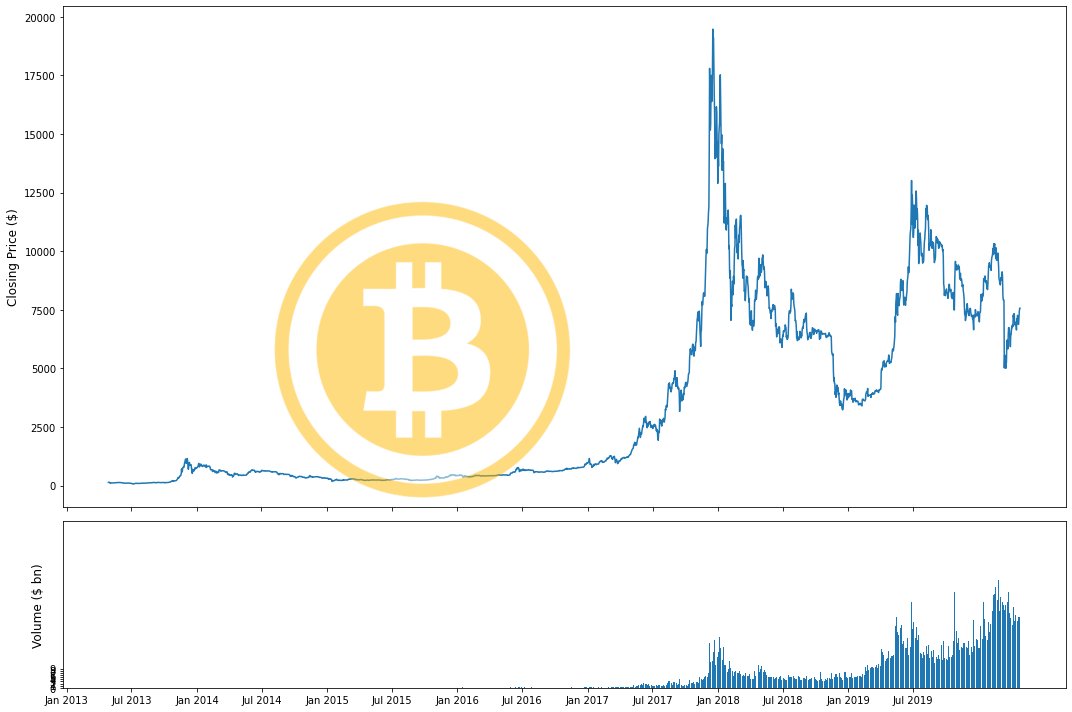

In [0]:
# fig= plt.figure(figsize=(6,3))

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(15,10))
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'],bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'], bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
fig.figimage(bitcoin_im, 100, 120, zorder=3,alpha=.5)
plt.show()

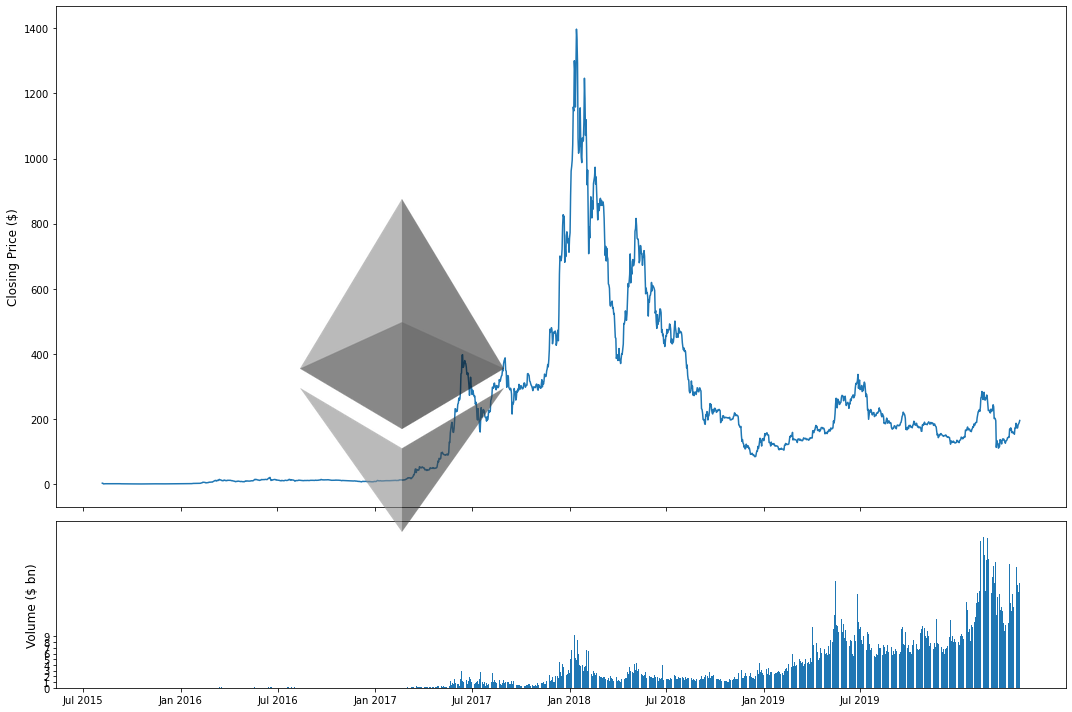

In [0]:


fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(15,10))
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(eth_market_info['Date'],eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'], eth_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im, 300, 180, zorder=3, alpha=.6)
plt.show()

In [0]:
eth_market_info['eth_Open']

bitcoin_market_info.columns

Index(['Date', 'bt_bt_Open', 'bt_bt_High', 'bt_bt_Low', 'bt_bt_Close',
       'bt_bt_Volume', 'bt_bt_Market Cap'],
      dtype='object')

In [0]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = market_info[market_info['Date']>='2016-01-01']

print(market_info)

for coins in ['bt_bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

           Date  bt_bt_Open  ...   eth_Volume  eth_Market Cap
0    2020-04-26     7570.14  ...  18335367012     21839976557
1    2020-04-25     7550.48  ...  18260969748     21637838417
2    2020-04-24     7434.18  ...  16788555028     20940434737
3    2020-04-23     7121.31  ...  21275740032     20472236139
4    2020-04-22     6879.44  ...  17994666395     20200984352
...         ...         ...  ...          ...             ...
1573 2016-01-05      433.07  ...       219833        72240974
1574 2016-01-04      430.06  ...       346245        72543707
1575 2016-01-03      433.58  ...       407632        73843292
1576 2016-01-02      434.62  ...       255504        71176658
1577 2016-01-01      430.72  ...       206062        71980386

[1578 rows x 13 columns]


,Date,bt_bt_Open,bt_bt_High,bt_bt_Low,bt_bt_Close,bt_bt_Volume,bt_bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_bt_day_diff,eth_day_diff
0,2020-04-26,7570.14,7700.59,7561.41,7679.87,33070154491,140903867573,195.41,199.34,194.77,197.32,18335367012,21839976557,0.014495,0.009774
1,2020-04-25,7550.48,7641.36,7521.67,7569.94,32941541447,138874072264,189.21,196.79,188.46,195.52,18260969748,21637838417,0.002577,0.033349
2,2020-04-24,7434.18,7574.20,7434.18,7550.90,34636526286,138512029491,185.22,190.21,185.22,189.24,16788555028,20940434737,0.015700,0.021704
3,2020-04-23,7121.31,7491.78,7081.59,7429.72,43500782316,136275638031,182.62,189.09,180.34,185.03,21275740032,20472236139,0.043308,0.013197
4,2020-04-22,6879.44,7145.87,6867.78,7117.21,33249153866,130530916077,172.67,183.75,171.83,182.60,17994666395,20200984352,0.034562,0.057509


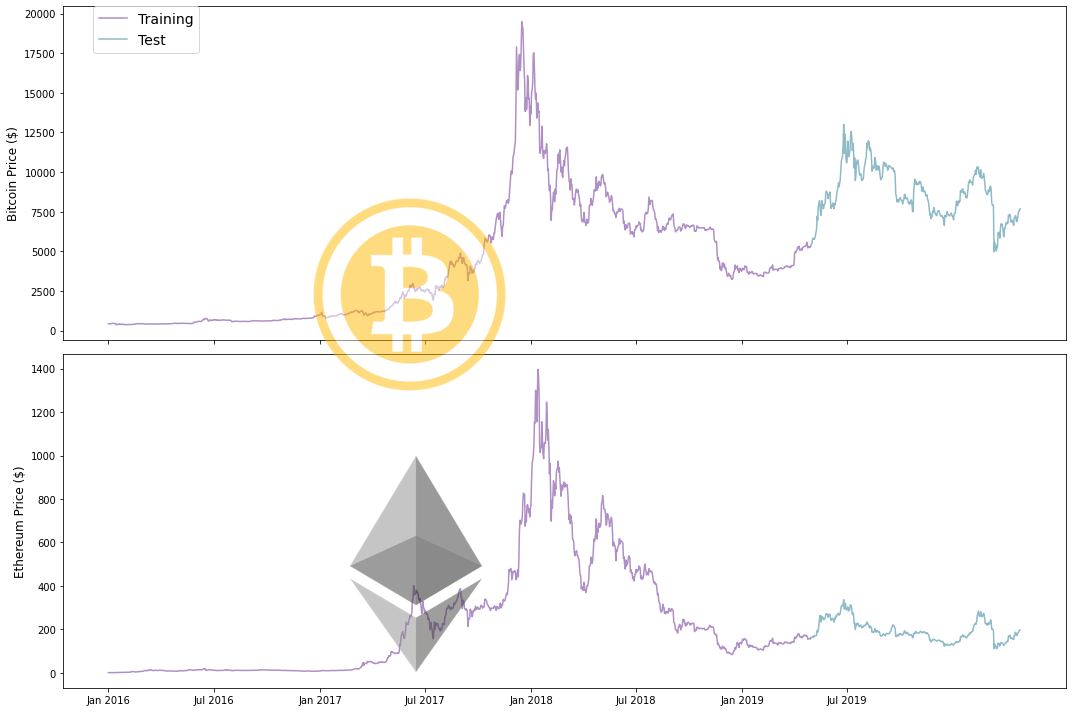

In [0]:
split_date = '2019-5-01'
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'],
         market_info[market_info['Date'] < split_date]['bt_bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'],
         market_info[market_info['Date'] >= split_date]['bt_bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'],
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'],
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.65), int(bitcoin_im.size[1]*0.65)), Image.ANTIALIAS), 
             200, 260, zorder=3,alpha=.5)
fig.figimage(eth_im.resize((int(eth_im.size[0]*0.65), int(eth_im.size[1]*0.65)), Image.ANTIALIAS), 
             350, 40, zorder=3,alpha=.5)
plt.show()

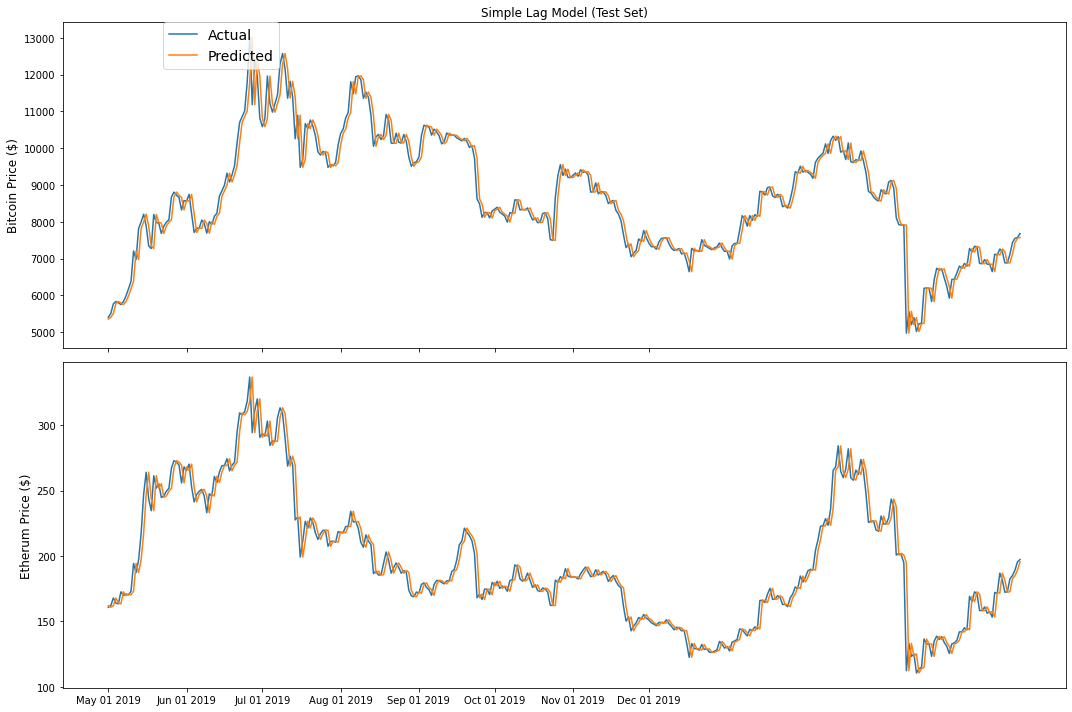

In [0]:

# trivial lag model: P_t = P_(t-1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.set_xticks([datetime.date(2019,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2019,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2019,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['bt_bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()

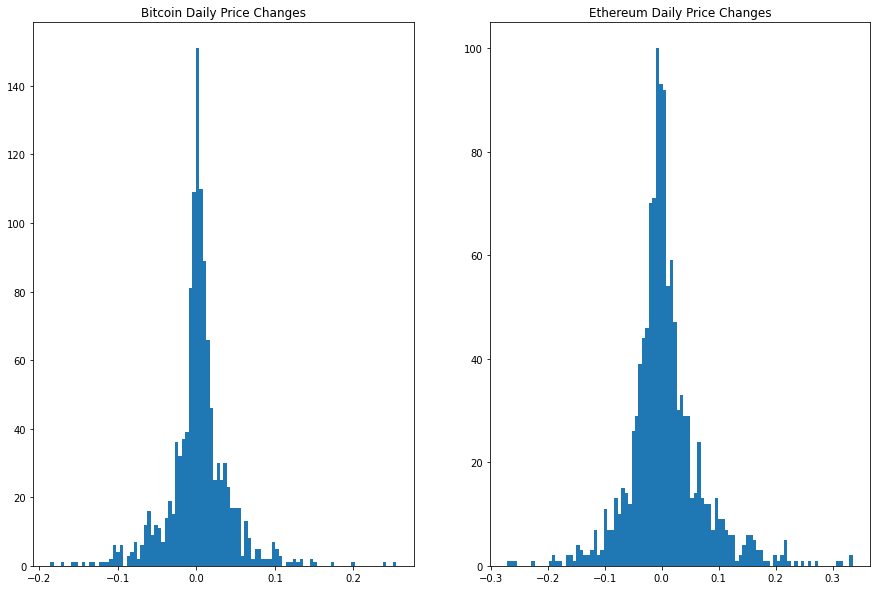

In [0]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 10))
ax1.hist(market_info[market_info['Date']< split_date]['bt_bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

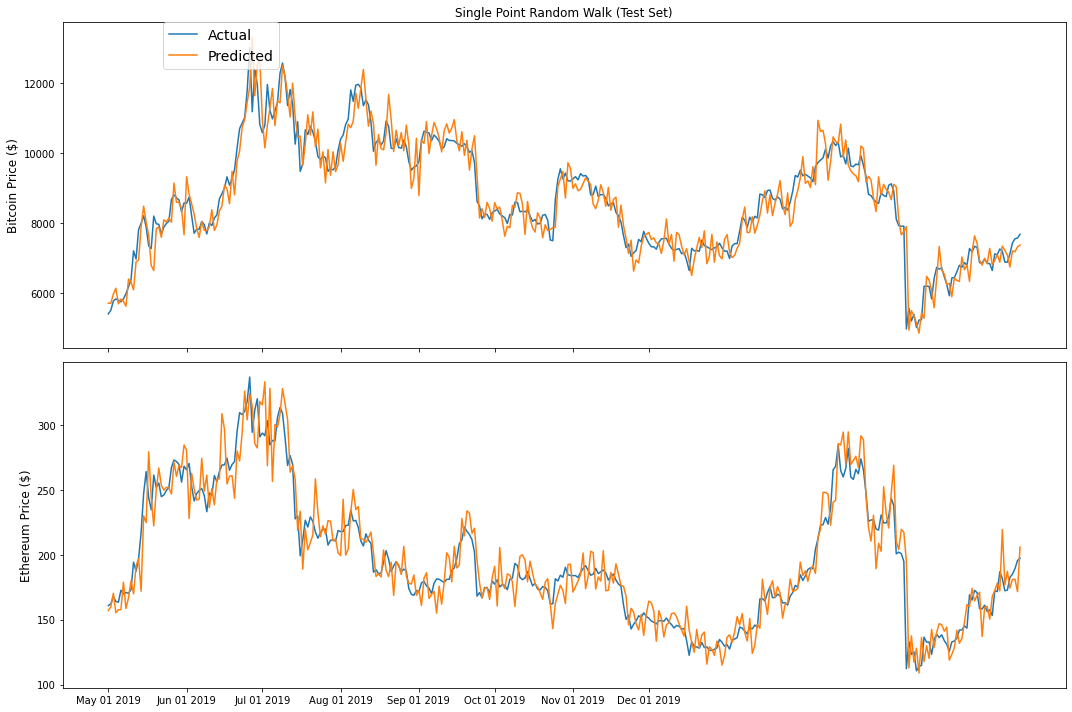

In [0]:
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 10))
ax1.set_xticks([datetime.date(2019,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2019,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2019,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
     market_info[market_info['Date']>= split_date]['bt_bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()
